# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
mock=["monterrey","saltillo"]
arrayCit = []
count=1
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    response=requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}")
    data=response.json()
    if(data["cod"]==200):
        celcisus_temp = data["main"]["temp_max"] - 273.15
        fahrenheit_temp = celcisus_temp * ( 9 / 5 ) + 32
        print(f"Processing Record {count} of {len(cities)} | {city}")
        #dataF={"City":city ,"Cloudiness": data["clouds"]["all"] , "Country":data["sys"]["country"] , "Date":data["dt"] , "Humidity":data["main"]["humidity"] , "Lat":data["coord"]["lat"] , "Lng":data["coord"]["lon"] , "MaxTemp":data["main"]["temp_max"] , "WindSpeed":data["wind"]["speed"]}
        dataV=(city,data["clouds"]["all"],data["sys"]["country"],data["dt"],data["main"]["humidity"] ,data["coord"]["lat"],data["coord"]["lon"],fahrenheit_temp,data["wind"]["speed"])
        arrayCit.append(dataV)
        count=count+1
    else:
        print(f"SKIP NOT FOUND CITY | {city}")
        count=count+1

Beginning Data Retrieval
------------------------
Processing Record 1 of 601 | calantas
Processing Record 2 of 601 | dikson
Processing Record 3 of 601 | verkhnedneprovskiy
Processing Record 4 of 601 | nikolskoye
Processing Record 5 of 601 | khatanga
Processing Record 6 of 601 | nanortalik
Processing Record 7 of 601 | mahanoro
Processing Record 8 of 601 | youghal
Processing Record 9 of 601 | port alfred
Processing Record 10 of 601 | rikitea
Processing Record 11 of 601 | barrow
Processing Record 12 of 601 | punta arenas
Processing Record 13 of 601 | alikalia
Processing Record 14 of 601 | victoria
Processing Record 15 of 601 | te anau
Processing Record 16 of 601 | tahoua
Processing Record 17 of 601 | mar del plata
Processing Record 18 of 601 | avarua
Processing Record 19 of 601 | baldeogarh
Processing Record 20 of 601 | bambous virieux
Processing Record 21 of 601 | nokaneng
Processing Record 22 of 601 | cherskiy
Processing Record 23 of 601 | mamallapuram
Processing Record 24 of 601 | plet

Processing Record 209 of 601 | cidreira
Processing Record 210 of 601 | patos
Processing Record 211 of 601 | hirara
SKIP NOT FOUND CITY | naugarzan
Processing Record 213 of 601 | kodinsk
Processing Record 214 of 601 | wamba
SKIP NOT FOUND CITY | karamea
Processing Record 216 of 601 | esperance
Processing Record 217 of 601 | souillac
Processing Record 218 of 601 | teeli
Processing Record 219 of 601 | tuatapere
Processing Record 220 of 601 | tikrit
Processing Record 221 of 601 | saint-georges
Processing Record 222 of 601 | leningradskiy
Processing Record 223 of 601 | padang
Processing Record 224 of 601 | upernavik
SKIP NOT FOUND CITY | tabiauea
Processing Record 226 of 601 | kieta
Processing Record 227 of 601 | tamandare
Processing Record 228 of 601 | broken hill
Processing Record 229 of 601 | lasa
SKIP NOT FOUND CITY | stoyba
SKIP NOT FOUND CITY | samusu
Processing Record 232 of 601 | sarakhs
Processing Record 233 of 601 | camocim
Processing Record 234 of 601 | shahreza
Processing Record

Processing Record 416 of 601 | itoman
Processing Record 417 of 601 | vanavara
Processing Record 418 of 601 | dhupgari
Processing Record 419 of 601 | cabedelo
Processing Record 420 of 601 | shu
Processing Record 421 of 601 | nalut
Processing Record 422 of 601 | jiaojiang
Processing Record 423 of 601 | nyurba
Processing Record 424 of 601 | kokopo
Processing Record 425 of 601 | fria
Processing Record 426 of 601 | viedma
Processing Record 427 of 601 | skibbereen
Processing Record 428 of 601 | marienburg
Processing Record 429 of 601 | torbay
SKIP NOT FOUND CITY | tsihombe
Processing Record 431 of 601 | fort-shevchenko
Processing Record 432 of 601 | semporna
SKIP NOT FOUND CITY | mirina
Processing Record 434 of 601 | otane
Processing Record 435 of 601 | tilichiki
Processing Record 436 of 601 | mackenzie
Processing Record 437 of 601 | fairbanks
Processing Record 438 of 601 | necochea
Processing Record 439 of 601 | schmalkalden
Processing Record 440 of 601 | pochinki
Processing Record 441 of 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
dfCities = pd.DataFrame(arrayCit, columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","WindSpeed"])
dfCities

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,WindSpeed
0,calantas,75,PH,1583038209,52,15.02,120.52,89.600,2.10
1,dikson,100,RU,1583038209,78,73.51,80.55,12.434,13.08
2,verkhnedneprovskiy,97,RU,1583038210,74,54.98,33.35,32.072,6.92
3,nikolskoye,100,RU,1583038210,92,59.70,30.79,28.994,3.00
4,khatanga,89,RU,1583038055,93,71.97,102.50,2.282,5.54
...,...,...,...,...,...,...,...,...,...
549,izalco,17,SV,1583038328,68,13.74,-89.67,68.000,4.60
550,yeppoon,40,AU,1583038328,48,-23.13,150.73,87.800,2.60
551,jieshi,4,CN,1583038328,64,22.81,115.83,80.996,1.39
552,balsas,94,BR,1583038049,94,-7.53,-46.04,73.184,0.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature')

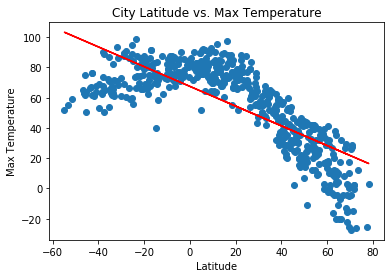

In [14]:
#plt.scatter(dfCities["Lat"], dfCities["Max Temp"])
x=dfCities["Lat"]
y=dfCities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Huidity')

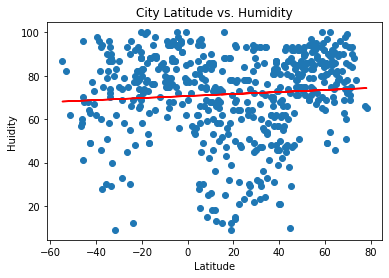

In [15]:
#plt.scatter(dfCities["Lat"], dfCities["Humidity"])
x=dfCities["Lat"]
y=dfCities["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Huidity")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

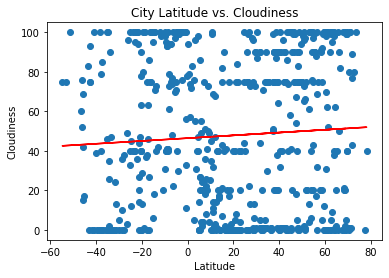

In [16]:
#plt.scatter(dfCities["Lat"], dfCities["Cloudiness"])
x=dfCities["Lat"]
y=dfCities["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

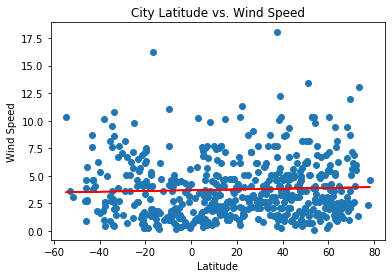

In [18]:
#plt.scatter(dfCities["Lat"], dfCities["WindSpeed"])
x=dfCities["Lat"]
y=dfCities["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots


In [20]:
# Create Northern and Southern Hemisphere DataFrames
Southern=dfCities[dfCities["Lat"]<0]
Northern=dfCities[dfCities["Lat"]>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -1.29


Text(0, 0.5, 'Max Temp')

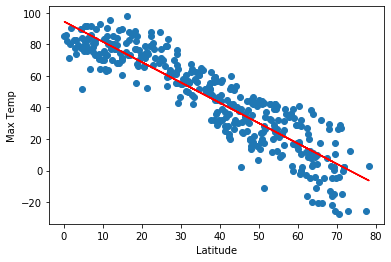

In [22]:
x=Northern["Lat"]
y=Northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.35


Text(0, 0.5, 'Max Temp')

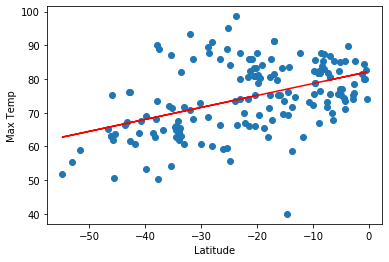

In [23]:
x=Southern["Lat"]
y=Southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35


Text(0, 0.5, 'Humidity')

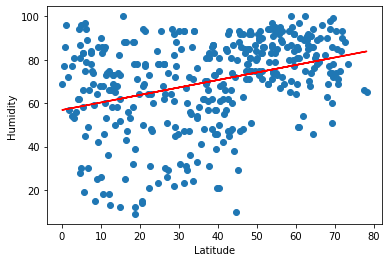

In [24]:
x=Northern["Lat"]
y=Northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41


Text(0, 0.5, 'Humidity')

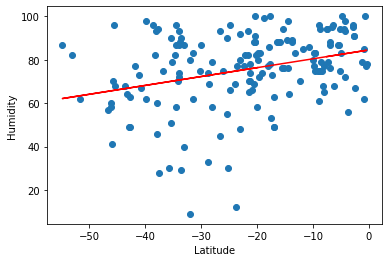

In [25]:
x=Southern["Lat"]
y=Southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.41


Text(0, 0.5, 'Cloudiness')

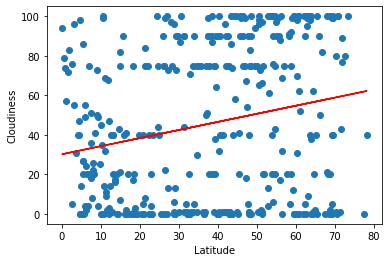

In [26]:
x=Northern["Lat"]
y=Northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.94


Text(0, 0.5, 'Cloudiness')

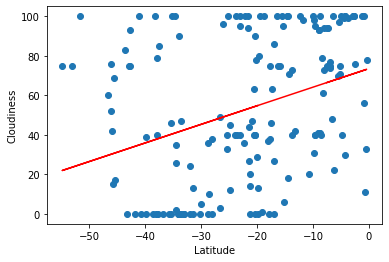

In [27]:
x=Southern["Lat"]
y=Southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


Text(0, 0.5, 'Wind Speed')

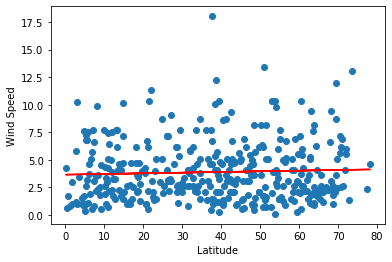

In [28]:
x=Northern["Lat"]
y=Northern["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.05


Text(0, 0.5, 'Wind Speed')

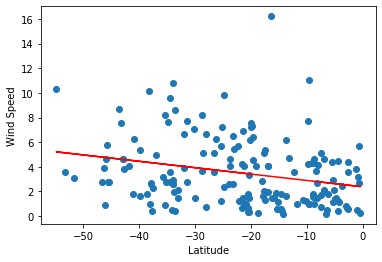

In [29]:
x=Southern["Lat"]
y=Southern["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")